# Computer Vision - Image Classification

<img src="https://static.vecteezy.com/system/resources/previews/000/691/498/non_2x/rock-paper-scissors-pop-art-vector-design.jpg" width="50%" height="auto">

Rock paper scissors is a hand game usually played between two people, in which each player simultaneously forms one of three shapes with an outstretched hand. These shapes are "rock", "paper", and "scissors". In this section, I will make a simple predict hand gesture from rock paper scissors dataset using Deep Learning algorithm (Convolutional Neural Network) with the TensorFlow framework. [Data source](https://www.kaggle.com/drgfreeman/rockpaperscissors)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
print(tf.__version__)

2.2.0


In [ ]:
import zipfile,os

zip_file = zipfile.ZipFile('/tmp/rockpaperscissors.zip', 'r')
zip_file.extractall('/tmp')
zip_file.close()

In [ ]:
basis_data = ImageDataGenerator(
                  rescale=1./255,
                  rotation_range=20,
                  shear_range = 0.2,
                  horizontal_flip=True,
                  vertical_flip = True,
                  height_shift_range=0.2,                
                  fill_mode = 'nearest',
                  validation_split = 0.2)

In [ ]:
data_all = '/tmp/rockpaperscissors/rps-cv-images/'

train_gen = basis_data.flow_from_directory(
        data_all, 
        target_size=(224, 224), 
        batch_size=8,
        interpolation='nearest',
        color_mode='rgb',
        subset='training',
        class_mode = 'categorical')

valid_gen = basis_data.flow_from_directory(
        data_all, 
        target_size=(224, 224),
        batch_size=8, 
        interpolation='nearest',
        color_mode='rgb',
        subset='validation',
        class_mode = 'categorical')

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.RMSprop(),
              metrics=['accuracy'])

In [ ]:
%%time
model.fit(
      train_gen,
      steps_per_epoch=50,  
      epochs=10,
      validation_data=valid_gen,
      validation_steps=50,  
      verbose=1)

Epoch 1/10
50/50 [==============================] - 35s 707ms/step - loss: 1.1364 - accuracy: 0.3625 - val_loss: 1.0817 - val_accuracy: 0.3650
Epoch 2/10
50/50 [==============================] - 35s 708ms/step - loss: 1.0816 - accuracy: 0.4000 - val_loss: 1.0231 - val_accuracy: 0.5175
Epoch 3/10
50/50 [==============================] - 35s 704ms/step - loss: 1.0185 - accuracy: 0.5025 - val_loss: 0.8339 - val_accuracy: 0.6000
Epoch 4/10
50/50 [==============================] - 35s 702ms/step - loss: 0.7879 - accuracy: 0.6850 - val_loss: 0.5903 - val_accuracy: 0.7750
Epoch 5/10
50/50 [==============================] - 35s 708ms/step - loss: 0.5215 - accuracy: 0.8421 - val_loss: 0.4447 - val_accuracy: 0.8350
Epoch 6/10
50/50 [==============================] - 35s 706ms/step - loss: 0.3998 - accuracy: 0.8700 - val_loss: 0.6058 - val_accuracy: 0.8325
Epoch 7/10
50/50 [==============================] - 36s 710ms/step - loss: 0.3873 - accuracy: 0.8850 - val_loss: 0.2208 - val_accuracy: 0.9175

Saving 1Io5Ksm3bqy87EAU.png to 1Io5Ksm3bqy87EAU.png
1Io5Ksm3bqy87EAU.png
scissor


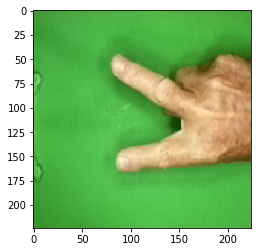

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(224,224))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=8)
  
  print(fn)
  if classes[0][0] == 1:
    print('paper')
  elif classes[0][1] == 1:
    print('rock')
  else:
    print('scissor')

The output of simple image classification works pretty well in a basic level implementation. If you have any questions and more details about this topic you can contact me on any platform. I also open to any other constructive comment that will be helped.